# Определение

Многомерный (мультивариативный, multivariate time series) временной ряд - это система из нескольких одномерных рядов, где значения одного (целевого) зависят не только от предыдущих значений этого ряда, но и от значений дополнительного, или нескольких дополнительных.

Дополнительные времянные ряды называются экзогенными.

Существует две возможные задачи при прогнозировании мультивариативного временного ряда.
1. 
На момент формирования прогноза будут доступны данные экзогенных временных рядов только на текущий момент времени и предыстория, то есть t, t-1, t-2, t-n, в то время как данные на индексы прогноза t+1, t+2, t+f (где f - горизонт прогнозирования), неизвестны.
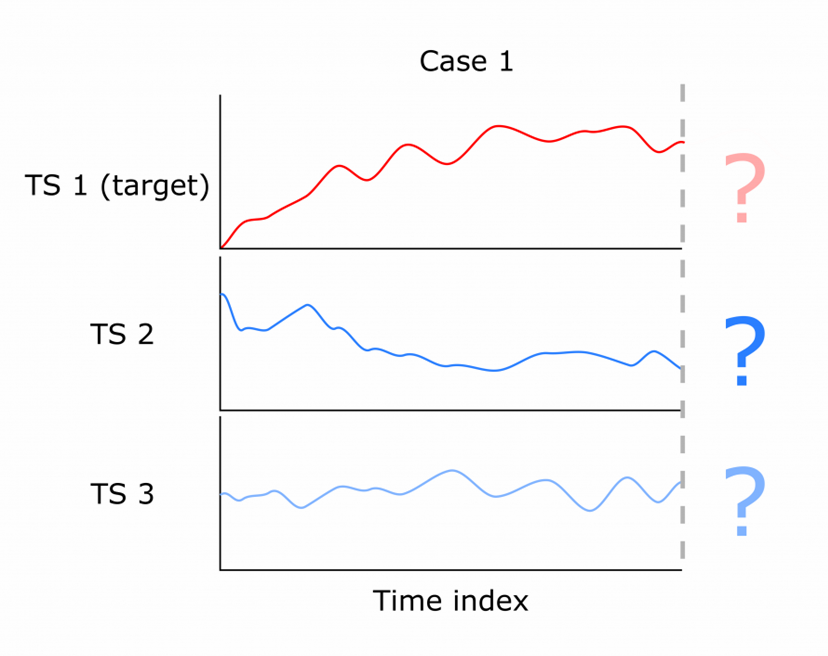

2.
Для целевого временного ряда значения на прогнозные индексы неизвестны, но зато есть информация об экзогенных в эти моменты времени.

Это задача регрессии, однако, поскольку данные упорядочены во времени, есть возможность решать “динамическую регрессию”, которая учитывает ещё и лаговые взаимосвязи в данных.
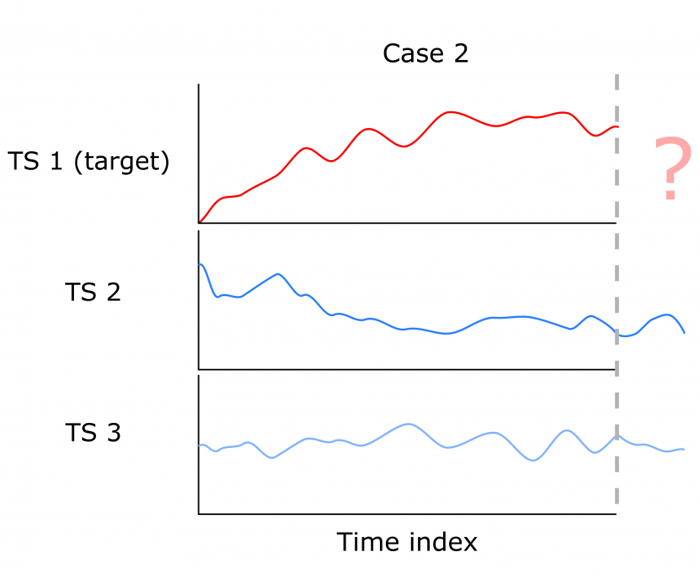



# Vector Auto Regression (VAR)

Векторная авторегрессия - один из наиболее используемых в настоящее время алгоритмов для предсказания мультивариативных временных рядов.

В алгоритме VAR каждая переменная является линейной функцией прошлых значений самой себя и прошлых значений всех других переменных. 

Допустим у нас есть две переменные: y1 и y2. Нам нужно спрогнозировать значение этих двух переменных в момент времени «t» на основе данных для прошлых n значений. Для простоты примем лаг равным 1.

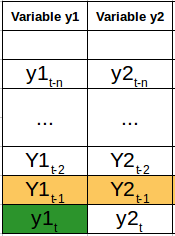 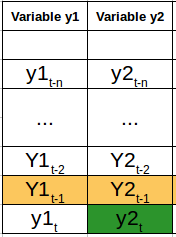

Чтобы вычислить y1(t), мы будем использовать прошлые значения y1 и y2. Аналогично, для вычисления y2(t) будут использоваться прошлые значения как y1, так и y2.

Простой математический способ представления этого отношения (Пусть это будет система уравнений 1):

 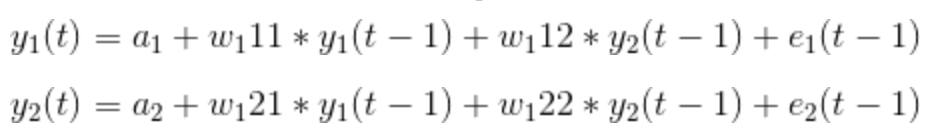

где
a1 и a2 — постоянные члены,
w11, w12, w21 и w22 — коэффициенты,
e1 и e2 — члены ошибки
Эти уравнения аналогичны уравнению процесса АР. Поскольку процесс AR используется для одномерных данных временных рядов, будущие значения представляют собой линейные комбинации только своих прошлых значений. Рассмотрим процесс AR(1):
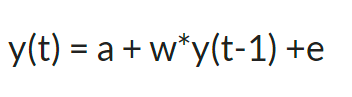

В этом случае у нас есть только одна переменная – y, постоянный член – a,  ошибка – e и коэффициент – w. Чтобы учесть несколько переменных членов в каждом уравнении для VAR, мы будем использовать векторы. Уравнения (1)  можно записать в следующем векторном виде:

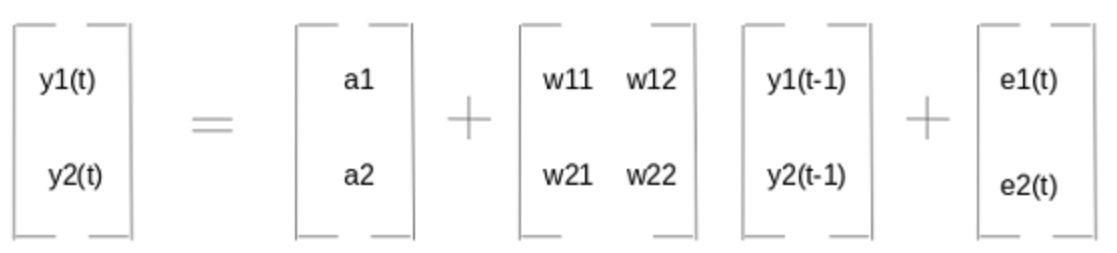


Двумя переменными являются y1 и y2, за которыми следуют вектор констант, тензор коэффициентов, вектор значений с задержкой и вектор  ошибок. Это векторное уравнение для процесса VAR(1). Для процесса VAR(2) к уравнению будет добавлен еще один векторный член для времени (t-2) для обобщения задержек p:
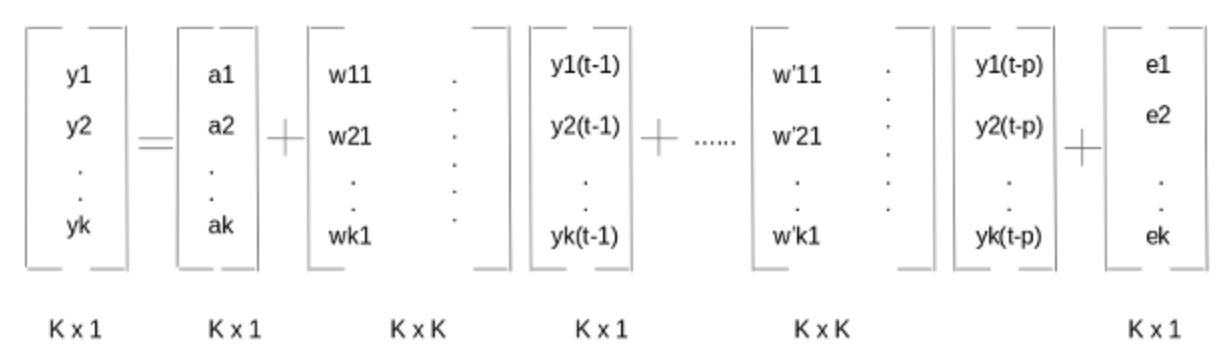

Ну или в другом виде это запишется в виде:
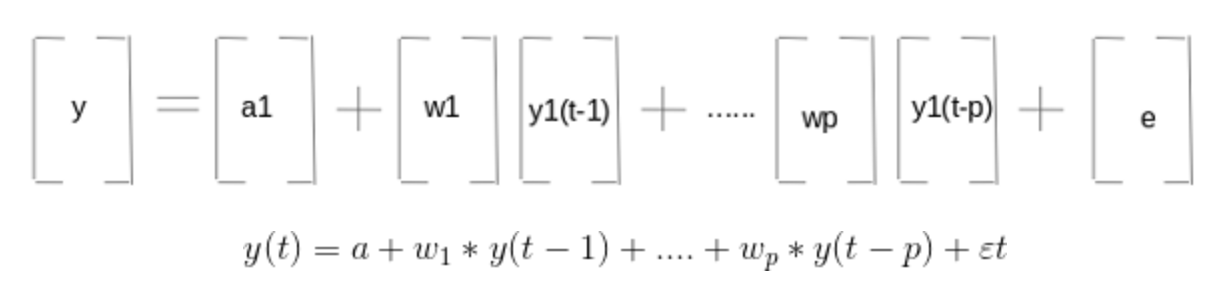

При этом должно выполняться:
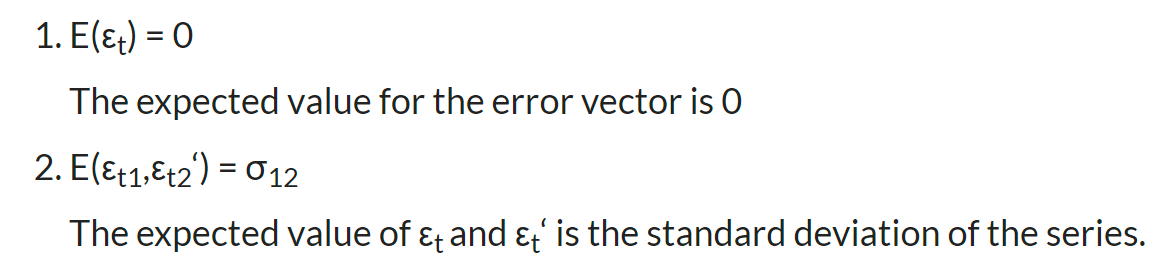

Granger causality test

Тест Грэнджера на причинность (англ. Granger causality test) — процедура проверки причинной (не причинно-следственной (!) связи («причинность по Грэнджеру»)

Тест можно использовать для выявления взаимосвязи между переменными до построения модели. Это важно, поскольку если между переменными нет связи, их можно исключить и смоделировать отдельно. И наоборот, если существует взаимосвязь, переменные необходимо учитывать на этапе моделирования.

Тест дает p-значение для переменных. Если значение p превышает 0,05, необходимо принять нулевую гипотезу. И наоборот, если значение p меньше 0,05, нулевую гипотезу следует отклонить.

В тесте Грэнджера последовательно проверяются две нулевые гипотезы: «x не является причиной y по Грэнджеру» и «у не является причиной x по Грэнджеру». Для проверки этих гипотез строятся две регрессии: в каждой регрессии зависимой переменной является одна из проверяемых на причинность переменных, а регрессорами выступают лаги обеих переменных (фактически это векторная авторегрессия).

${\displaystyle y_{t}=a_{0}+a_{1}y_{t-1}+...+a_{p}y_{t-p}+b_{1}x_{t-1}+...+b_{p}x_{t-p}+\varepsilon _{t}}$
 
${\displaystyle x_{t}=c_{0}+c_{1}x_{t-1}+...+c_{p}x_{t-p}+d_{1}y_{t-1}+...+d_{p}y_{t-p}+u_{t}}$

Для каждой регрессии нулевая гипотеза заключается в том, что коэффициенты при лагах второй переменной одновременно равны нулю.

${\displaystyle H_{0}^{1}:~b_{1}=...=b_{p}=0}$

${\displaystyle H_{0}^{2}:~d_{1}=...=d_{p}=0}$

Данные гипотезы можно проверить, например, с помощью F-теста или LM-теста. Необходимо отметить, что результаты теста могут зависеть от количества использованных лагов в регрессиях.

# Stationarity of a Multivariate Time Series

Стационарные ряды предсказываются лучше, чем нестационнарные. Подобно расширенному тесту Дики-Фуллера для одномерных рядов, у нас есть тест Йохансена для проверки стационарности любых данных многомерных временных рядов.

# Train-Validation Split

На трейн, тест и валидационные наборы необходимо делить с учетом временных интервалов, не перемешивая значения.

Рассмотрим мультивариативный ряд

Данные взяты с химического мультисенсорного устройства качества воздуха. 
Устройство было расположено на поле в значительно загрязненной зоне, на уровне дороги в итальянском городе. Данные были записаны с марта 2004 г. по февраль 2005 г. (один год) и представляют собой самые длительные свободно доступные записи реакций химических датчиков качества воздуха, развернутых на местах. Усредненные почасовые концентрации Ground Truth для CO, неметановых углеводородов, бензола, общих оксидов азота (NOx) и диоксида азота (NO2) были получены с помощью расположенного рядом эталонного сертифицированного анализатора. Свидетельства перекрестной чувствительности, а также дрейфа как концепций, так и датчиков присутствуют, как описано в De Vito et al., Sens. And Act. Б, Том. 129,2,2008 (требуется ссылка), что в конечном итоге влияет на возможности оценки концентрации датчиков. Отсутствующие значения помечены значением -200.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
# считываем данные
df = pd.read_csv("data/dry_bean_dataset/Dry_Bean_Dataset.csv", sep = ";",decimal =",")
df.head

<bound method NDFrame.head of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  r

In [3]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
def data_overview(df, head=5):
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

data_overview(df)

------------------------------------------------------- MISSING VALUES ------------------------------------------------------
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
68
--------------------------------------------------------- DATA TYPES --------------------------------------------------------
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidi

In [45]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [20]:
m_dict = {
    "Class":{"SEKER":0, "BARBUNYA":1, "BOMBAY":2, "CALI":3, "HOROZ":4, "SIRA":5, "DERMASON":6} 
}

df = df.replace(m_dict)
df.head

<bound method NDFrame.head of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  r

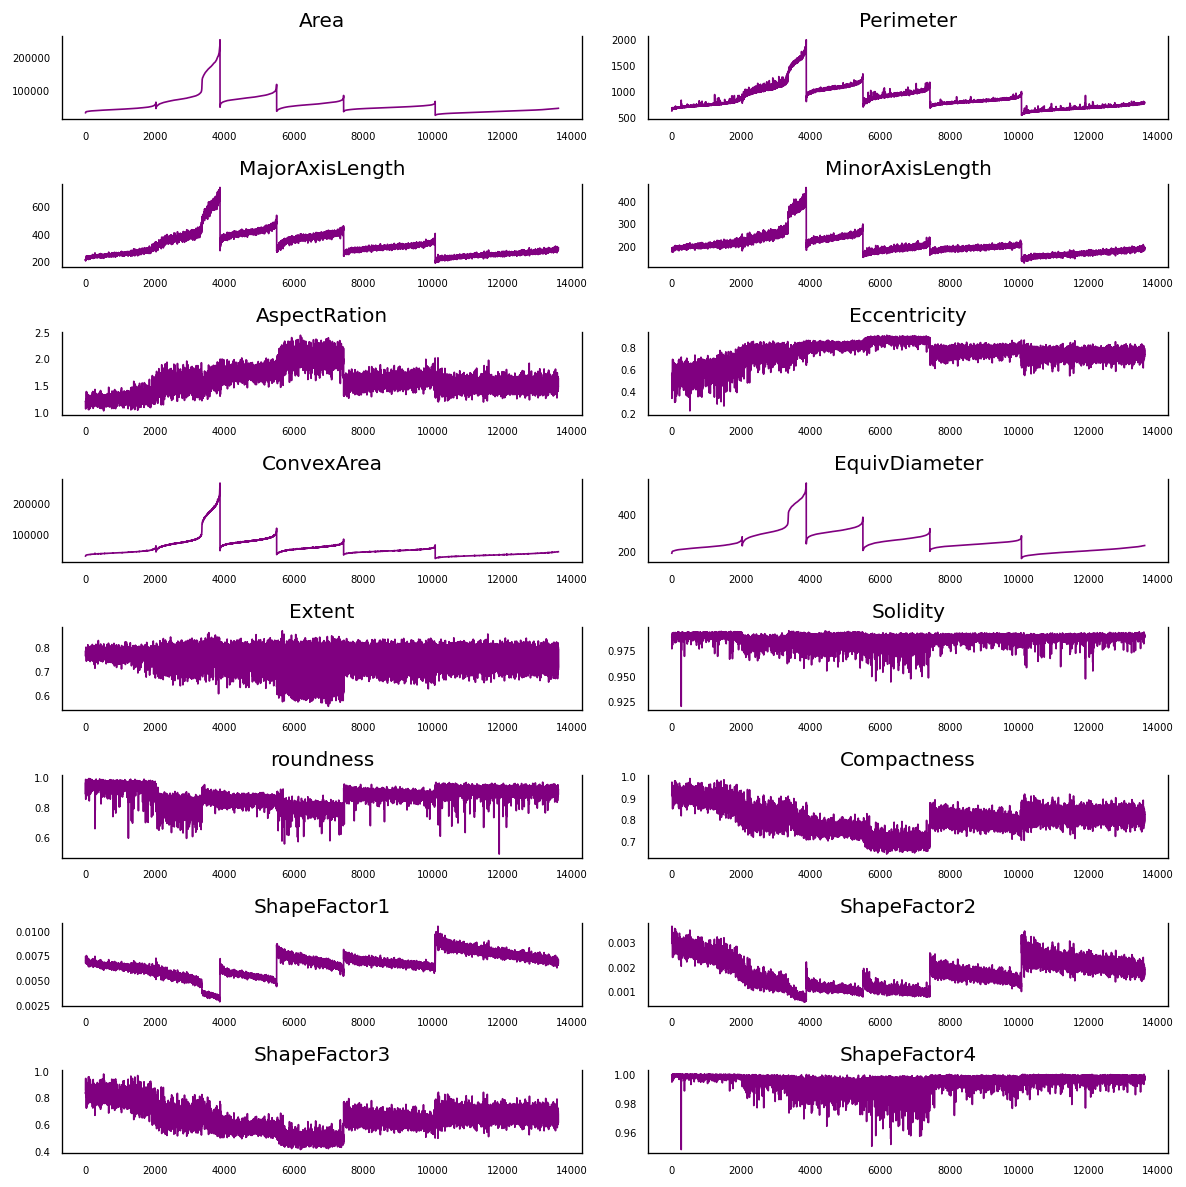

In [21]:
# Plot
fig, axes = plt.subplots(nrows=8, ncols=2, dpi=120, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='purple', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Работа с отсутствующими значениями
Следующий шаг — разобраться с пропущенными значениями. Не всегда целесообразно использовать df.dropna. Поскольку пропущенные значения в данных заменяются значением -200, нам придется заменить недостающее значение лучшим числом. 

Если текущее значение точки росы отсутствует, мы можем с уверенностью предположить, что оно будет близко к значению предыдущего часа. Будем вместо -200  запиывать предыдущее значение.

Можно использовать другие вариант борьбы с пропусками.

In [22]:
# заменяем отсутствующие значения

cols = df.columns
 
for j in range(1,len(cols)):
    for i in range(0,len(df.iloc[:,j])):
       if df.iloc[i,j] == -200.0:
           df.iloc[i,j] = df.iloc[i,j-1]

           

In [23]:
# кол-во элементов для тестовой выборки
test_split_number=round(len(df)*0.25)
test_split_number

3403

In [24]:
# разбиваем датасет на тестовый и обучающий
train=df[:-test_split_number]
test=df[-test_split_number:]


print(train.shape)
print(test.shape)

(10208, 17)
(3403, 17)


In [25]:
#Функция теста Адфулера на стационарность
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    # if p_value <= signif:
    #     print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
    #     print(f" => Ряд стационарный.")
    # else:
    #     print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
    #     print(f" => Ряд не стационарный.")  

    if output["pvalue"] < signif  :
        print(f"Значение p меньше {signif * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {signif*100}%. Ряд не стационарный.")

In [26]:
#Проверка на стационарность
for name, column in train.items():
    adfuller_test(column, name=column.name)
    print('\n')
#Как можно видеть все ряды стационарные на уровне значимости 0.05

    Augmented Dickey-Fuller Test on "Area" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4562
 No. Lags Chosen       = 4
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
Значение p меньше 5.0%. Ряд стационарный.


    Augmented Dickey-Fuller Test on "Perimeter" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.877
 No. Lags Chosen       = 9
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
Значение p меньше 5.0%. Ряд стационарный.


    Augmented Dickey-Fuller Test on "MajorAxisLength" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7865
 No. Lags Ch

In [27]:
# grangers_causation_matrix(df, variables = df.columns) 

NameError: name 'grangers_causation_matrix' is not defined

# Коинтегральность

Когда два или более временных ряда коинтегрированы, это означает, что они имеют долгосрочную, статистически значимую связь.

Это основная предпосылка, на которой основаны модели векторной авторегрессии (VAR).
Итак, довольно часто перед началом построения VAR-моделей проводят тест на коинтеграцию.

более технически:
Порядок интегрирования (d) — это не что иное, как количество разностей, необходимое для того, 
чтобы сделать нестационарный временной ряд стационарным.

Теперь, когда у вас есть два или более временных ряда и существует их линейная комбинация, 
у которой порядок интегрирования (d) меньше, чем у отдельного ряда, тогда совокупность рядов называется коинтегрированной.

In [29]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)



In [30]:
cointegration_test(df)

C:\Users\kanze\AppData\Local\Temp\ipykernel_12052\3054894920.py:5: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  out = coint_johansen(df,-1,5)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Area   ::  15972.39  > nan       =>   False
Perimeter ::  13324.89  > nan       =>   False
MajorAxisLength ::  11167.29  > nan       =>   False
MinorAxisLength ::  9100.0    > nan       =>   False
AspectRation ::  7100.13   > nan       =>   False
Eccentricity ::  5117.21   > 311.1288  =>   True
ConvexArea ::  3416.42   > 263.2603  =>   True
EquivDiameter ::  2239.61   > 219.4051  =>   True
Extent ::  1543.06   > 179.5199  =>   True
Solidity ::  980.21    > 143.6691  =>   True
roundness ::  457.25    > 111.7797  =>   True
Compactness ::  243.77    > 83.9383   =>   True
ShapeFactor1 ::  143.0     > 60.0627   =>   True
ShapeFactor2 ::  70.28     > 40.1749   =>   True
ShapeFactor3 ::  32.7      > 24.2761   =>   True
ShapeFactor4 ::  12.93     > 12.3212   =>   True
Class  ::  0.0       > 4.1296    =>   False


In [31]:
# Стационарность
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [32]:
# Разделяем выборку на трейн и тест
#creating the train and validation set
train = df[:int(0.8*(len(data)))]
test = df[int(0.8*(len(data))):]



In [33]:
for name, column in train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Area" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4659
 No. Lags Chosen       = 4
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0089. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Perimeter" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8538
 No. Lags Chosen       = 9
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.051. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "MajorAxisLength" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

In [34]:
# если нестационарный, то удаляем тренд (помните дифференцирование ?) и опять проверяеми
# 1st difference
df_differenced = train.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')



    Augmented Dickey-Fuller Test on "Area" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -49.7023
 No. Lags Chosen       = 4
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Perimeter" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -42.3356
 No. Lags Chosen       = 8
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "MajorAxisLength" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significanc

In [35]:
# если опять нестационарные - опять дифференцируем


df_differenced = df_differenced.diff().dropna()

# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Area" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.0996
 No. Lags Chosen       = 39
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Perimeter" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.7498
 No. Lags Chosen       = 39
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "MajorAxisLength" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

In [36]:
# Чтобы выбрать правильный порядок модели VAR, мы итеративно подбираем возрастающие порядки модели VAR и выбираем порядок, который дает модель с наименьшим AIC.

from statsmodels.tsa.vector_ar.var_model import VAR


model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')




c:\Users\kanze\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  -90.76168248488469
BIC :  -90.55660089205578
FPE :  3.825622832797668e-40
HQIC:  -90.69255533981762 

Lag Order = 2
AIC :  -94.8582622627534
BIC :  -94.45946088325668
FPE :  6.361804222297512e-42
HQIC:  -94.72383710056715 

Lag Order = 3
AIC :  -97.34844732286983
BIC :  -96.75589543640072
FPE :  5.27359826441754e-43
HQIC:  -97.14871319362213 

Lag Order = 4
AIC :  -98.93404903234642
BIC :  -98.147715910804
FPE :  1.0801639721483174e-43
HQIC:  -98.66899498323659 

Lag Order = 5
AIC :  -100.23818737572495
BIC :  -99.25804228320915
FPE :  2.9316409334903024e-44
HQIC:  -99.90780245109288 

Lag Order = 6
AIC :  -101.18788443258379
BIC :  -100.01389662539282
FPE :  1.1341338994029903e-44
HQIC:  -100.79215767390899 

Lag Order = 7
AIC :  -101.89364703533255
BIC :  -100.52578576196008
FPE :  5.599612285958829e-45
HQIC:  -101.43256748123306 

Lag Order = 8
AIC :  -102.45456805833328
BIC :  -100.89280255946582
FPE :  3.195628456010853e-45
HQIC:  -101.92812474456471 

Lag Ord

In [37]:
# другой вариает - автозаполнение. Лучшие метрики выделены *

x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-81.92,-81.91,2.634e-36,-81.92
1,-90.78,-90.58,3.750e-40,-90.71
2,-94.87,-94.47,6.278e-42,-94.74
3,-97.35,-96.76,5.239e-43,-97.16
4,-98.93,-98.15,1.081e-43,-98.67
5,-100.2,-99.25,2.939e-44,-99.91
6,-101.2,-100.0,1.139e-44,-100.8
7,-101.9,-100.5,5.625e-45,-101.4
8,-102.5,-100.9,3.208e-45,-101.9
9,-102.9,-101.2,1.958e-45,-102.4


In [38]:
# заполняем модель с лучшими параметрами
model_fitted = model.fit(12)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Dec, 2023
Time:                     14:47:54
--------------------------------------------------------------------
No. of Equations:         17.0000    BIC:                   -101.600
Nobs:                     10874.0    HQIC:                  -103.150
Log likelihood:           306291.    FPE:                7.25322e-46
AIC:                     -103.938    Det(Omega_mle):     5.28007e-46
--------------------------------------------------------------------
Results for equation Area
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.175674        21.540078           -0.008           0.993
L1.Area                     1.032972         0.238455            4.332           0.000
L1.Perimeter               12.507156 

# проверяяем оставшуюся последовательную корреляцию

Последовательная корреляция остатков используется для проверки наличия в остатках какого-либо остаточного шаблона (ошибок). Если в остатках осталась какая-либо корреляция, то во временном ряду есть некоторая закономерность, которую еще предстоит объяснить с помощью модели. В этом случае типичный образ действий — либо увеличить порядок модели, либо ввести в систему больше предикторов, либо искать другой алгоритм для моделирования временного ряда.

Распространенный способ проверки серийной корреляции ошибок можно измерить с помощью статистики Дурбина Уотсона.

Значение этой статистики может варьироваться от 0 до 4. Чем ближе она к значению 2, тем значимой последовательной корреляции нет. Чем ближе к 0, существует положительная последовательная корреляция, а чем ближе к 4, подразумевается отрицательная последовательная корреляция.

In [39]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

# for col, val in zip(df.columns, out):
#    print(adjust(col), ':', round(val, 2))
    
for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Area : 2.01
Perimeter : 2.03
MajorAxisLength : 2.03
MinorAxisLength : 2.04
AspectRation : 2.03
Eccentricity : 2.04
ConvexArea : 2.01
EquivDiameter : 2.01
Extent : 2.04
Solidity : 2.03
roundness : 2.04
Compactness : 2.04
ShapeFactor1 : 2.03
ShapeFactor2 : 2.04
ShapeFactor3 : 2.04
ShapeFactor4 : 2.03
Class : 2.01


Для прогнозирования модель VAR ожидает количество наблюдений, равное порядку задержки (лагов), на основе прошлых данных. Это связано с тем, что члены модели VAR по сути являются лагами различных временных рядов в наборе данных, поэтому вам необходимо предоставить столько предыдущих значений, сколько указано в порядке запаздывания, используемом моделью.

In [40]:
# получаем значение лага
lag_order = model_fitted.k_ar
print(lag_order) 

12


In [41]:
# данные для предсказания
forecast_input = df_differenced.values[-lag_order:]
forecast_input

array([[-7.00000000e+00, -1.20140000e+01, -2.56799054e+01,
         1.70507700e+01, -3.35925454e-01, -1.27783133e-01,
         4.80000000e+01, -2.35186000e-02,  1.88671275e-01,
        -1.91550500e-03,  3.53491310e-02,  8.88079570e-02,
        -9.08343000e-04,  7.26150000e-04,  1.43976830e-01,
        -1.36144700e-03,  0.00000000e+00],
       [-2.00000000e+00,  3.44140000e+01,  4.05418156e+01,
        -2.65681110e+01,  5.24925646e-01,  2.03031049e-01,
         1.12000000e+02, -6.71870000e-03, -6.92265300e-02,
        -3.93988900e-03, -1.00113072e-01, -1.40813421e-01,
         1.43779600e-03, -1.15514800e-03, -2.28696254e-01,
        -1.21054300e-03,  0.00000000e+00],
       [ 2.00000000e+00, -3.56760000e+01, -3.80034978e+01,
         2.43220433e+01, -4.96014462e-01, -1.77778657e-01,
        -2.27000000e+02,  6.71800000e-03, -3.28339180e-02,
         7.91764900e-03,  1.01828986e-01,  1.29275340e-01,
        -1.34775200e-03,  1.03858700e-03,  2.07779845e-01,
         1.68127500e-03,  0.0

In [42]:
# Forecast
nobs = 20 # количество точек для предсказания
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs defined at top of program
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Area_2d,Perimeter_2d,MajorAxisLength_2d,MinorAxisLength_2d,AspectRation_2d,Eccentricity_2d,ConvexArea_2d,EquivDiameter_2d,Extent_2d,Solidity_2d,roundness_2d,Compactness_2d,ShapeFactor1_2d,ShapeFactor2_2d,ShapeFactor3_2d,ShapeFactor4_2d,Class_2d
13591,-120.144002,-31.498247,-27.889693,18.439714,-0.354923,-0.152773,-417.246447,-0.159514,0.028700,0.008978,0.086921,0.099980,-0.000996,8.477816e-04,0.164656,0.001681,0.001606
13592,928.527373,22.748022,16.183587,-8.818899,0.189395,0.085417,1095.607224,1.370287,-0.000338,-0.003754,-0.047610,-0.054482,0.000533,-4.786541e-04,-0.090277,-0.000813,-0.004756
13593,-918.481281,-13.558481,-4.089177,0.528874,-0.038333,-0.009258,-932.629898,-1.355601,-0.003648,0.000475,0.019694,0.008896,-0.000093,7.632043e-05,0.013808,-0.000578,0.002593
13594,340.395704,7.617168,0.427307,0.594037,-0.001953,-0.010376,309.293687,0.488426,-0.015390,-0.000127,-0.011074,0.003411,-0.000036,4.662368e-05,0.006779,0.001220,-0.000180
13595,-359.196113,-0.889535,1.235642,-1.464361,0.029998,0.009611,-273.753119,-0.483635,0.008703,-0.001205,-0.003868,-0.007894,0.000096,-6.940943e-05,-0.012509,-0.000394,0.001640
13596,-173.189543,-2.017670,-1.259733,-0.095666,-0.013535,0.004016,-253.864190,-0.385955,-0.002559,0.000285,-0.000641,0.001375,-0.000013,-2.870354e-06,0.000888,-0.000409,0.001763
13597,-69.414077,-4.180552,-1.618964,1.069620,-0.005575,-0.011760,-109.343656,-0.026711,0.005894,0.001722,0.009419,0.003900,-0.000017,3.522278e-05,0.007603,0.001138,-0.001502
13598,473.256806,8.464304,2.893042,-0.589326,0.002606,0.010773,596.981657,0.710701,0.001362,-0.001868,-0.007981,-0.003355,-0.000010,-2.198542e-05,-0.006602,-0.001538,-0.001530
13599,111.431629,-7.412694,-0.449431,0.609403,-0.004274,-0.004344,-1.836067,0.262543,0.006512,0.001698,0.014131,0.002189,-0.000024,1.857785e-05,0.003857,0.000578,-0.001054
13600,60.436766,5.271236,-0.572543,0.342565,-0.003278,-0.002933,83.321346,-0.041894,-0.016272,-0.001012,-0.009675,0.001229,0.000002,8.618284e-06,0.002221,-0.000097,0.000869


Вспоминаем, что для предсказания мы модифицировали датасет. (мы его дифференцировали). Теперь надо обратно вернуть.

In [43]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [48]:
cl = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'] 
df_results = invert_transformation(train, df_forecast, second_diff=True)        
df_results

,Area_2d,Perimeter_2d,MajorAxisLength_2d,MinorAxisLength_2d,AspectRation_2d,Eccentricity_2d,ConvexArea_2d,EquivDiameter_2d,Extent_2d,Solidity_2d,...,ShapeFactor1_1d,ShapeFactor1_forecast,ShapeFactor2_1d,ShapeFactor2_forecast,ShapeFactor3_1d,ShapeFactor3_forecast,ShapeFactor4_1d,ShapeFactor4_forecast,Class_1d,Class_forecast
13591,-120.144002,-31.498247,-27.889693,18.439714,-0.354923,-0.152773,-417.246447,-0.159514,0.028700,0.008978,...,-4.726672e-04,0.007999,0.000414,0.002473,0.079260,0.706977,0.000878,0.998135,0.001606,6.001606
13592,928.527373,22.748022,16.183587,-8.818899,0.189395,0.085417,1095.607224,1.370287,-0.000338,-0.003754,...,6.075431e-05,0.008060,-0.000065,0.002408,-0.011017,0.695960,0.000065,0.998200,-0.003150,5.998457
13593,-918.481281,-13.558481,-4.089177,0.528874,-0.038333,-0.009258,-932.629898,-1.355601,-0.003648,0.000475,...,-3.192012e-05,0.008028,0.000011,0.002419,0.002791,0.698750,-0.000513,0.997687,-0.000556,5.997900
13594,340.395704,7.617168,0.427307,0.594037,-0.001953,-0.010376,309.293687,0.488426,-0.015390,-0.000127,...,-6.814429e-05,0.007960,0.000058,0.002477,0.009569,0.708320,0.000706,0.998393,-0.000736,5.997164
13595,-359.196113,-0.889535,1.235642,-1.464361,0.029998,0.009611,-273.753119,-0.483635,0.008703,-0.001205,...,2.740288e-05,0.007987,-0.000012,0.002465,-0.002939,0.705380,0.000313,0.998706,0.000904,5.998068
13596,-173.189543,-2.017670,-1.259733,-0.095666,-0.013535,0.004016,-253.864190,-0.385955,-0.002559,0.000285,...,1.452421e-05,0.008002,-0.000014,0.002451,-0.002052,0.703328,-0.000096,0.998610,0.002667,6.000735
13597,-69.414077,-4.180552,-1.618964,1.069620,-0.005575,-0.011760,-109.343656,-0.026711,0.005894,0.001722,...,-2.956946e-06,0.007999,0.000021,0.002472,0.005551,0.708879,0.001041,0.999651,0.001165,6.001899
13598,473.256806,8.464304,2.893042,-0.589326,0.002606,0.010773,596.981657,0.710701,0.001362,-0.001868,...,-1.249961e-05,0.007987,-0.000001,0.002471,-0.001051,0.707828,-0.000497,0.999155,-0.000366,6.001534
13599,111.431629,-7.412694,-0.449431,0.609403,-0.004274,-0.004344,-1.836067,0.262543,0.006512,0.001698,...,-3.632565e-05,0.007950,0.000017,0.002488,0.002806,0.710634,0.000082,0.999237,-0.001420,6.000114
13600,60.436766,5.271236,-0.572543,0.342565,-0.003278,-0.002933,83.321346,-0.041894,-0.016272,-0.001012,...,-3.458012e-05,0.007916,0.000026,0.002514,0.005027,0.715661,-0.000015,0.999221,-0.000551,5.999563


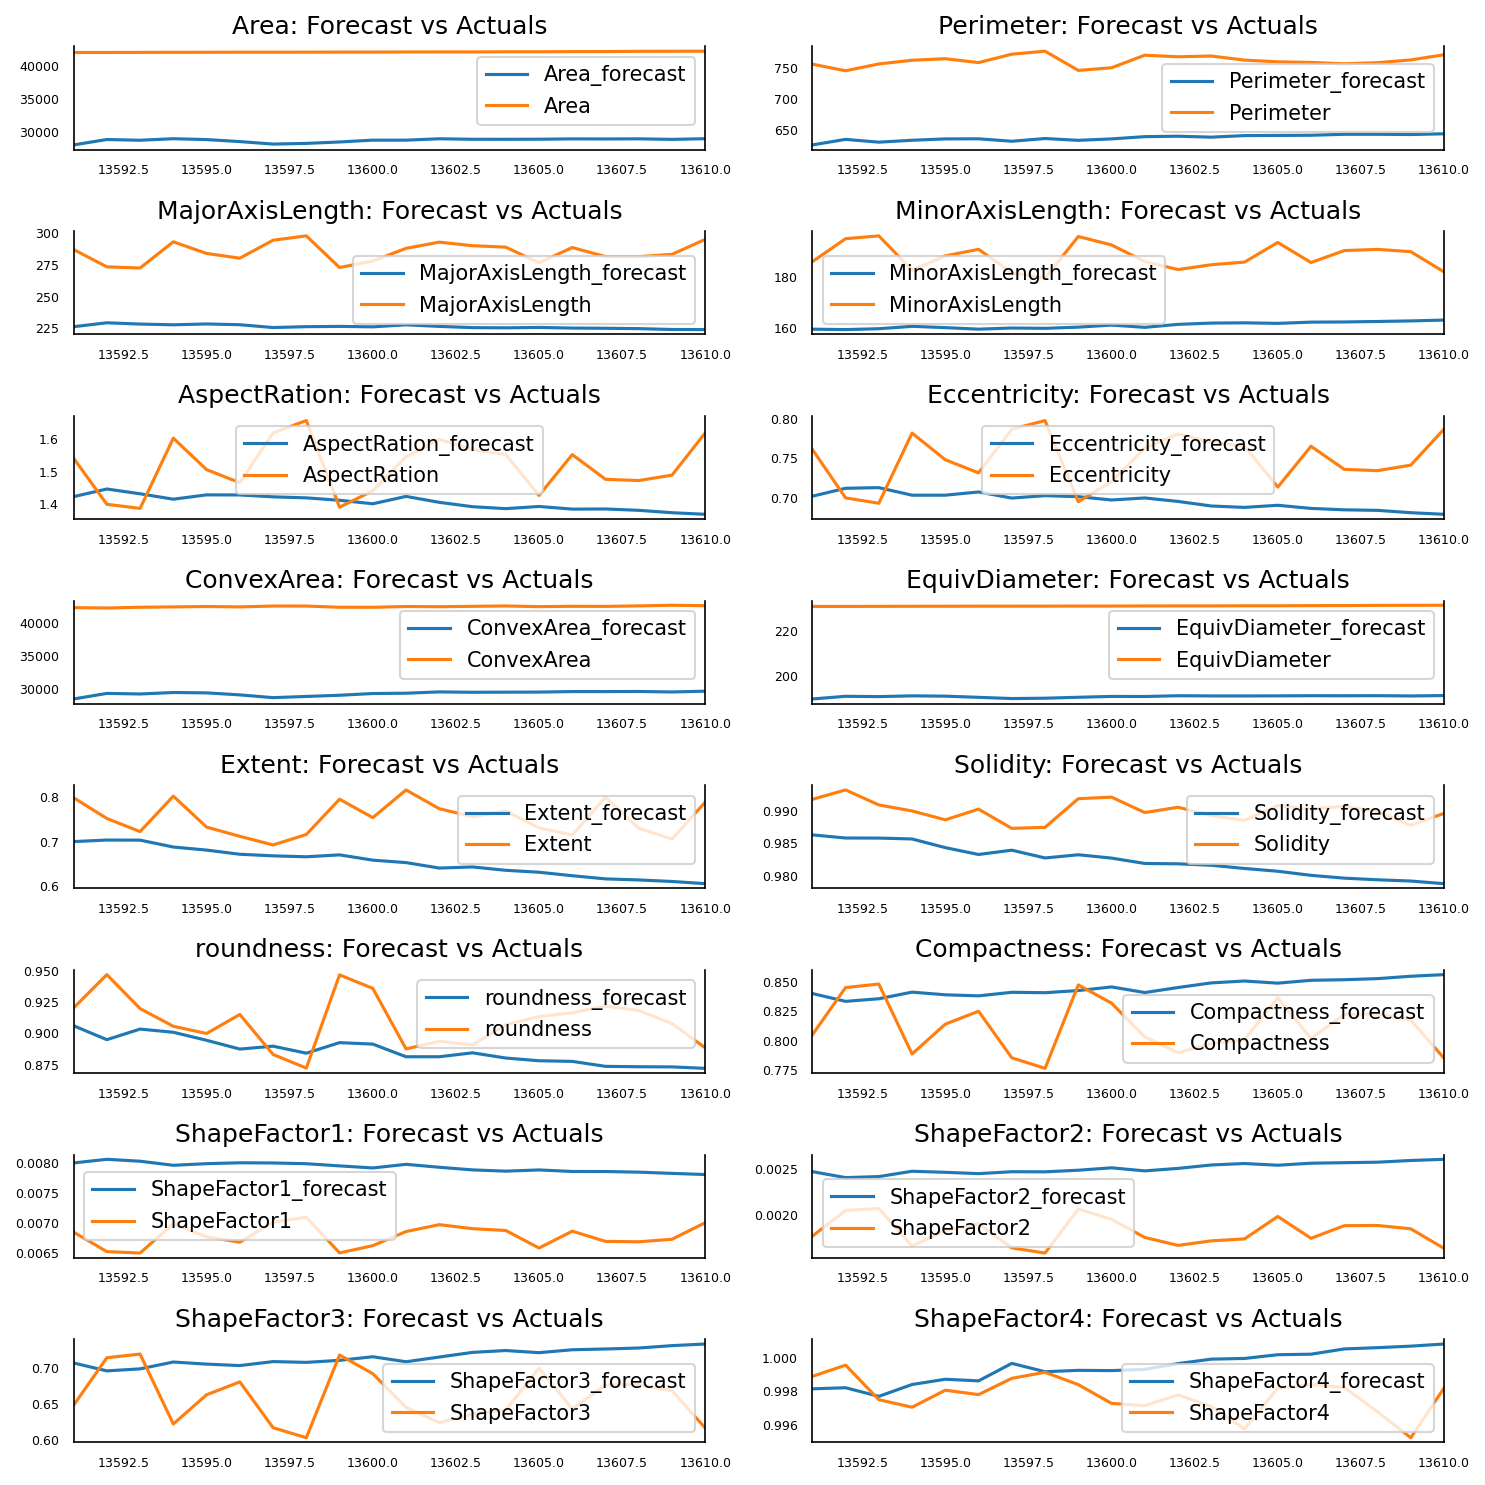

In [49]:
# отрисовываем


fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [50]:
# Метрики!

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [51]:
cols = test.columns.to_list()

for vi in range(len(cols)):
    print(f'Forecast Accuracy of: {cols[vi]}')
    n1 = f"{cols[vi]}_forecast"
    accuracy_prod = forecast_accuracy(df_results[n1].values, np.array(test.iloc[len(test) - 20: len(test),vi]))
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))



Forecast Accuracy of: Area
mape :  0.3142
me :  -13211.2696
mae :  13211.2696
mpe :  -0.3142
rmse :  13213.6413
corr :  0.5316
minmax :  0.3142
Forecast Accuracy of: Perimeter
mape :  0.1645
me :  -125.436
mae :  125.436
mpe :  -0.1645
rmse :  125.7289
corr :  0.2458
minmax :  0.1645
Forecast Accuracy of: MajorAxisLength
mape :  0.2053
me :  -58.699
mae :  58.699
mpe :  -0.2053
rmse :  59.2731
corr :  -0.3446
minmax :  0.2053
Forecast Accuracy of: MinorAxisLength
mape :  0.1452
me :  -27.463
mae :  27.463
mpe :  -0.1452
rmse :  27.9729
corr :  -0.1363
minmax :  0.1452
Forecast Accuracy of: AspectRation
mape :  0.0779
me :  -0.1099
mae :  0.1213
mpe :  -0.0697
rmse :  0.1403
corr :  -0.191
minmax :  0.0778
Forecast Accuracy of: Eccentricity
mape :  0.074
me :  -0.0527
mae :  0.0565
mpe :  -0.0685
rmse :  0.0637
corr :  -0.3049
minmax :  0.074
Forecast Accuracy of: ConvexArea
mape :  0.3093
me :  -13134.0742
mae :  13134.0742
mpe :  -0.3093
rmse :  13137.4316
corr :  0.3766
minmax :  0.3

c:\Users\kanze\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\kanze\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
